<a href="https://colab.research.google.com/github/mathewmahoneyds20/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv')


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [12]:
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [13]:
#frequency of male and female characters

sex = pd.crosstab(index=df["Gender"], columns="count")
print(sex)

sex/sex.sum()*100

col_0   count
Gender       
0         263
1         222


col_0,count
Gender,
0,54.226804
1,45.773196


About 54 percent of the characters in these movies were female and 45 percent were males.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [14]:
survival = pd.crosstab(index= df['Survival'], columns='count')
print(survival)

survival/survival.sum()*100

col_0     count
Survival       
0           400
1            85


col_0,count
Survival,
0,82.474227
1,17.525773


82 percent of the characters did not survive while about 18 percent of them did.

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [17]:
pd.crosstab(df['Gender'], df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


There was total of 228 female characters that did not survive and 172 male characters that did not 
survive. Compared to 35 females that survived and 50 males that survived. More females survived but there were also more female characters.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [22]:
pd.crosstab(df['Gender'], df['Survival'], normalize = "index")*100

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


There were more female characters then males and more males that survived then females.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no significant relationship between character sex and survival

**Ha:** There is a significant relationship between character sex and survival

In [28]:
from scipy.stats import chi2_contingency

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [30]:
g, p, dof, expctd = chi2_contingency(pd.crosstab(df['Gender'], df['Survival']))
print(p)

0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

We would reject the null hypothesis at any significance level and conclude there is a relationship between the two variables.


### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

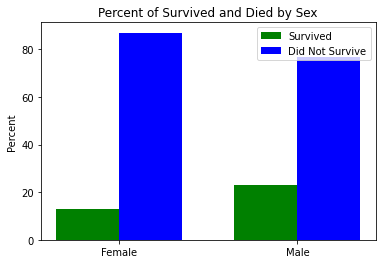

In [32]:
import matplotlib.pyplot as plt

N = 2 
Survived = (13, 23)
Died  =     (87, 77)

ind= np.arange(N) #x locations
width = 0.353 #plot width

#the plot

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Survived, width, color = 'g') #survivors
rects2 = ax.bar(ind + width, Died, width, color = 'b') #died

ax.set_ylabel('Percent')
ax.set_title('Percent of Survived and Died by Sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female', 'Male'))

ax.legend((rects1[0], rects2[0]), ('Survived', 'Did Not Survive'))

Though alot of charcters do not survive in horror movies...
1. The difference of death between male and females was much more higher
2. Female characters were killed off more frequently.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [34]:
import statsmodels.api as sm

table = np.asarray([[13, 23],[87, 77]])
t22 = sm.stats.Table2x2(table)
print(t22.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        0.500        0.237 1.055   0.069
Log odds ratio   -0.693 0.381 -1.439 0.053   0.069
Risk ratio        0.681        0.431 1.076   0.100
Log risk ratio   -0.385 0.234 -0.842 0.073   0.100
--------------------------------------------------


Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.